# Deanna Clayton
## Module 6 Assignment
https://github.com/declayton/620-mod6

# Web Mining and Applied NLP (44-620)

## Web Scraping and NLP with Requests, BeautifulSoup, and spaCy

### Student Name: Deanna Clayton

Perform the tasks described in the Markdown cells below.  When you have completed the assignment make sure your code cells have all been run (and have output beneath them) and ensure you have committed and pushed ALL of your changes to your assignment repository.

Every question that requires you to write code will have a code cell underneath it; you may either write your entire solution in that cell or write it in a python file (`.py`), then import and run the appropriate code to answer the question.

1. Write code that extracts the article html from https://web.archive.org/web/20210327165005/https://hackaday.com/2021/03/22/how-laser-headlights-work/ and dumps it to a .pkl (or other appropriate file)

In [1]:
import requests  # import needed modules
import pickle

article = requests.get('https://web.archive.org/web/20210327165005/https://hackaday.com/2021/03/22/how-laser-headlights-work/')
article_html = article.text                # extract the html from an article

with open('620-mod6-assignment.pkl', 'wb') as f:
    pickle.dump(article.text, f)                   # dump text into pickle file

2. Read in your article's html source from the file you created in question 1 and print it's text (use `.get_text()`)

In [2]:
from bs4 import BeautifulSoup             # import needed module

with open('620-mod6-assignment.pkl', 'rb') as f:
    article_html = pickle.load(f)                   # open pickle file

parser = 'html.parser'             # parse the text
soup = BeautifulSoup(article_html, parser)

article_element = soup.find('article')       # print the article text
print(article_element.get_text())



How Laser Headlights Work


                130 Comments            

by:
Lewin Day



March 22, 2021








When we think about the onward march of automotive technology, headlights aren’t usually the first thing that come to mind. Engines, fuel efficiency, and the switch to electric power are all more front of mind. However, that doesn’t mean there aren’t thousands of engineers around the world working to improve the state of the art in automotive lighting day in, day out.
Sealed beam headlights gave way to more modern designs once regulations loosened up, while bulbs moved from simple halogens to xenon HIDs and, more recently, LEDs. Now, a new technology is on the scene, with lasers!

Laser Headlights?!
BWM’s prototype laser headlight assemblies undergoing testing.
The first image brought to mind by the phrase “laser headlights” is that of laser beams firing out the front of an automobile. Obviously, coherent beams of monochromatic light would make for poor illumination outside o

3. Load the article text into a trained `spaCy` pipeline, and determine the 5 most frequent tokens (converted to lower case).  Print the common tokens with an appropriate label.  Additionally, print the tokens their frequencies (with appropriate labels). Make sure to remove things we don't care about (punctuation, stopwords, whitespace).

In [3]:
import spacy                    # import needed modules
from spacytextblob.spacytextblob import SpacyTextBlob
from collections import Counter

nlp = spacy.load('en_core_web_sm')              # load text into spaCy pipeline
nlp.add_pipe('spacytextblob')
document = nlp(article_element.get_text())

def wanted_tokens(token):                     # function to get desired tokens
    return not (token.is_space or token.is_punct or token.is_stop)

interesting_tokens = [token for token in document if wanted_tokens(token)]     # get list of tokens, count token frequency
token_freq = Counter(map(str,interesting_tokens))
print('The five most common tokens and their frequencies are:', token_freq.most_common(5))    # print five most common tokens and their frequencies

The five most common tokens and their frequencies are: [('laser', 29), ('headlights', 17), ('technology', 10), ('headlight', 10), ('LED', 10)]


4. Load the article text into a trained `spaCy` pipeline, and determine the 5 most frequent lemmas (converted to lower case).  Print the common lemmas with an appropriate label.  Additionally, print the lemmas with their frequencies (with appropriate labels). Make sure to remove things we don't care about (punctuation, stopwords, whitespace).

In [4]:
import spacy                                         # import needed modules
from spacytextblob.spacytextblob import SpacyTextBlob
from collections import Counter

nlp = spacy.load('en_core_web_sm')          # load text into spaCy pipeline
nlp.add_pipe('spacytextblob')  
document2 = nlp(article_element.get_text())

interesting_lemmas = [token.lemma_.lower() for token in document2 if wanted_tokens(token)] # get list of lemmas, count token frequency
lemma_freq = Counter(interesting_lemmas)
print('The five most common lemmas and their frequencies are:', lemma_freq.most_common(5))   # print five most common lemmas and their frequencies

The five most common lemmas and their frequencies are: [('laser', 40), ('headlight', 28), ('beam', 12), ('led', 11), ('technology', 10)]


5. Define the following methods:
    * `score_sentence_by_token(sentence, interesting_token)` that takes a sentence and a list of interesting token and returns the number of times that any of the interesting words appear in the sentence divided by the number of words in the sentence
    * `score_sentence_by_lemma(sentence, interesting_lemmas)` that takes a sentence and a list of interesting lemmas and returns the number of times that any of the interesting lemmas appear in the sentence divided by the number of words in the sentence
    
You may find some of the code from the in class notes useful; feel free to use methods (rewrite them in this cell as well).  Test them by showing the score of the first sentence in your article using the frequent tokens and frequent lemmas identified in question 3.

In [5]:
sentences = list(document.sents)
interesting_tokens = [token for token in document if wanted_tokens(token)]
interesting_lemmas = [token.lemma_.lower() for token in document if wanted_tokens(token)]

def score_sentence_by_token(sentence, interesting_token):         # token method defined
    count = 0
    count_token = 0
    for token in sentence:
        count += 1
        if token in interesting_token:
            count_token += 1
    sent_str = str(sentence).replace('\n','').replace('  ',' ')
    return(count_token / count)

def score_sentence_by_lemma(sentence, interesting_lemma):       # lemma method defined
    count = 0
    count_lemma = 0
    for token in sentence:
        count += 1
        if token.lemma_.lower() in interesting_lemma:
            count_lemma += 1
    sent_str = str(sentence).replace('\n','').replace('  ',' ')
    return(count_lemma / count)
    
# Examples
print(score_sentence_by_token(sentences[0], interesting_tokens))
print(score_sentence_by_lemma(sentences[0], interesting_lemmas))

0.5
0.5


6. Make a list containing the scores (using tokens) of every sentence in the article, and plot a histogram with appropriate titles and axis labels of the scores. From your histogram, what seems to be the most common range of scores (put the answer in a comment after your code)?

[0.5, 0.43478260869565216, 0.3888888888888889, 0.36363636363636365, 0.5666666666666667, 0.2857142857142857, 0.4, 0.7, 0.38461538461538464, 0.5217391304347826, 0.35294117647058826, 0.6111111111111112, 0.4444444444444444, 0.375, 0.5, 0.23076923076923078, 0.4444444444444444, 0.4166666666666667, 0.5833333333333334, 0.4375, 0.5238095238095238, 0.5909090909090909, 0.391304347826087, 0.5357142857142857, 0.4642857142857143, 0.56, 0.35294117647058826, 0.55, 0.46153846153846156, 0.4166666666666667, 0.5833333333333334, 0.41025641025641024, 0.45, 0.4, 0.4864864864864865, 0.3235294117647059, 0.3333333333333333, 0.45454545454545453, 0.4375, 0.4444444444444444, 0.4358974358974359, 0.4, 0.4642857142857143, 0.3684210526315789, 0.4, 0.5681818181818182, 0.45454545454545453, 0.6666666666666666, 0.45454545454545453, 0.3448275862068966, 0.4482758620689655, 0.43243243243243246, 0.5384615384615384, 0.4666666666666667, 0.35714285714285715, 0.28, 0.6086956521739131]


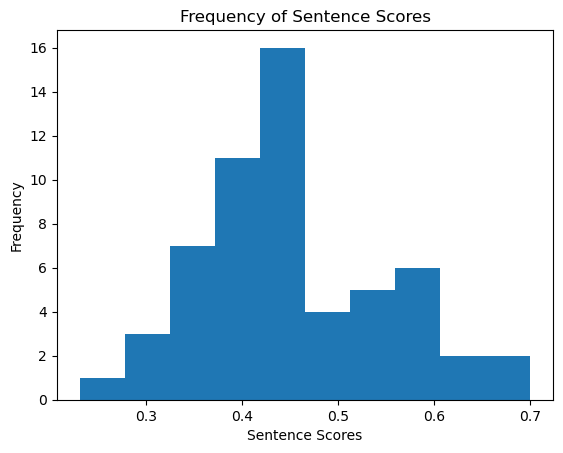

In [6]:
sentences = list(document.sents)
interesting_tokens = [token for token in document if wanted_tokens(token)]

list_token = []
for sentence in sentences:        # list of token scores
    list_token.append(score_sentence_by_token(sentence, interesting_tokens))
    
print(list_token)

import matplotlib.pyplot as plt

plt.hist(list_token)            # create histogram
plt.title("Frequency of Sentence Scores")
plt.xlabel('Sentence Scores')
plt.ylabel('Frequency')
plt.show() 

# The most common range of token scores seems to be the 0.35 to 0.45 range, with the highest occuring around 0.45 with a frequency around 16.

7. Make a list containing the scores (using lemmas) of every sentence in the article, and plot a histogram with appropriate titles and axis labels of the scores.  From your histogram, what seems to be the most common range of scores (put the answer in a comment after your code)?

[0.5, 0.43478260869565216, 0.3888888888888889, 0.36363636363636365, 0.5666666666666667, 0.2857142857142857, 0.4, 0.7, 0.38461538461538464, 0.5652173913043478, 0.35294117647058826, 0.6111111111111112, 0.5, 0.375, 0.5, 0.23076923076923078, 0.4444444444444444, 0.4166666666666667, 0.5833333333333334, 0.53125, 0.5238095238095238, 0.6363636363636364, 0.391304347826087, 0.5714285714285714, 0.5, 0.56, 0.35294117647058826, 0.55, 0.46153846153846156, 0.4166666666666667, 0.5833333333333334, 0.46153846153846156, 0.5, 0.4, 0.4864864864864865, 0.3235294117647059, 0.3333333333333333, 0.45454545454545453, 0.5, 0.4444444444444444, 0.4358974358974359, 0.45, 0.4642857142857143, 0.3684210526315789, 0.4, 0.5681818181818182, 0.45454545454545453, 0.6666666666666666, 0.45454545454545453, 0.3448275862068966, 0.4482758620689655, 0.43243243243243246, 0.5384615384615384, 0.4666666666666667, 0.35714285714285715, 0.28, 0.6086956521739131]


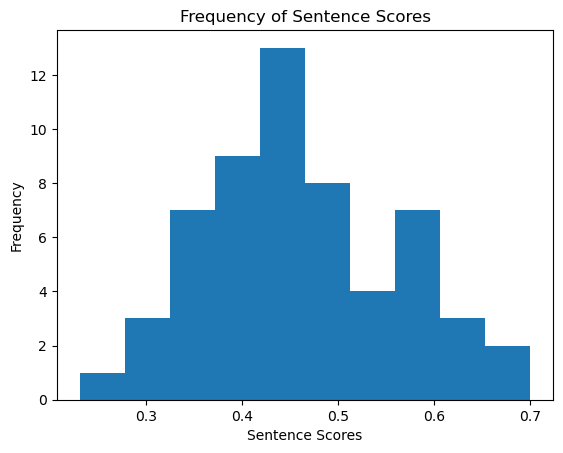

In [7]:
sentences = list(document.sents)
interesting_lemmas = [token.lemma_.lower() for token in document if wanted_tokens(token)]

list_lemma = []
for sentence in sentences:        # list of lemma scores
    list_lemma.append(score_sentence_by_lemma(sentence, interesting_lemmas))
    
print(list_lemma)

import matplotlib.pyplot as plt

plt.hist(list_lemma)          # create histogram
plt.title("Frequency of Sentence Scores")
plt.xlabel('Sentence Scores')
plt.ylabel('Frequency')
plt.show() 

# The most common range of lemma scores seems to be the 0.4 to 0.5 range, with the highest occuring around 0.45 with a frequency around 12.

8. Which tokens and lexems would be ommitted from the lists generated in questions 3 and 4 if we only wanted to consider nouns as interesting words?  How might we change the code to only consider nouns? Put your answer in this Markdown cell (you can edit it by double clicking it).

The tokens and lexems to be ommitted would be any of those that are not nouns, such as verbs. We could change the code by doing the following:

def noun_tokens(token):
    
    return (token.tag_ == 'NN')
    
or by adding to the original definition:

def wanted_tokens(token):
    
    return not (token.is_space or token.is_punct or token.is_stop or token.tag_ != 'NN')